# **Breast cancer**

Project based on [dataset](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) obtained from a (fine needle aspiration) biopsy of the breast. The task was to train a classifier that classify a tumor as benign or malignant.

Importing necessary packages:

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Defining scoring function:

In [6]:
def printScores(model, X, Y):
    print("Classification report:")
    print(classification_report(Y, model.predict(X)))
    print("Confusion matrix:")
    print(confusion_matrix(Y, model.predict(X)))

Loading *breast dataset* and creating a DataFrame:

In [7]:
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer['data'], columns = cancer['feature_names'])
df["label"] = cancer['target']
df["label names"] = cancer['target_names'][cancer['target']]

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label,label names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


Class counts and feature violin plot:

Class counts:
        mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
label                                                                          
0              212           212             212        212              212   
1              357           357             357        357              357   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
label                                                                         
0                   212             212                  212            212   
1                   357             357                  357            357   

       mean fractal dimension  ...  worst texture  worst perimeter  \
label                          ...                                   
0                         212  ...            212              212   
1                         357  ...            357              357   

       worst area  worst smoothness  worst compactness  worst conc

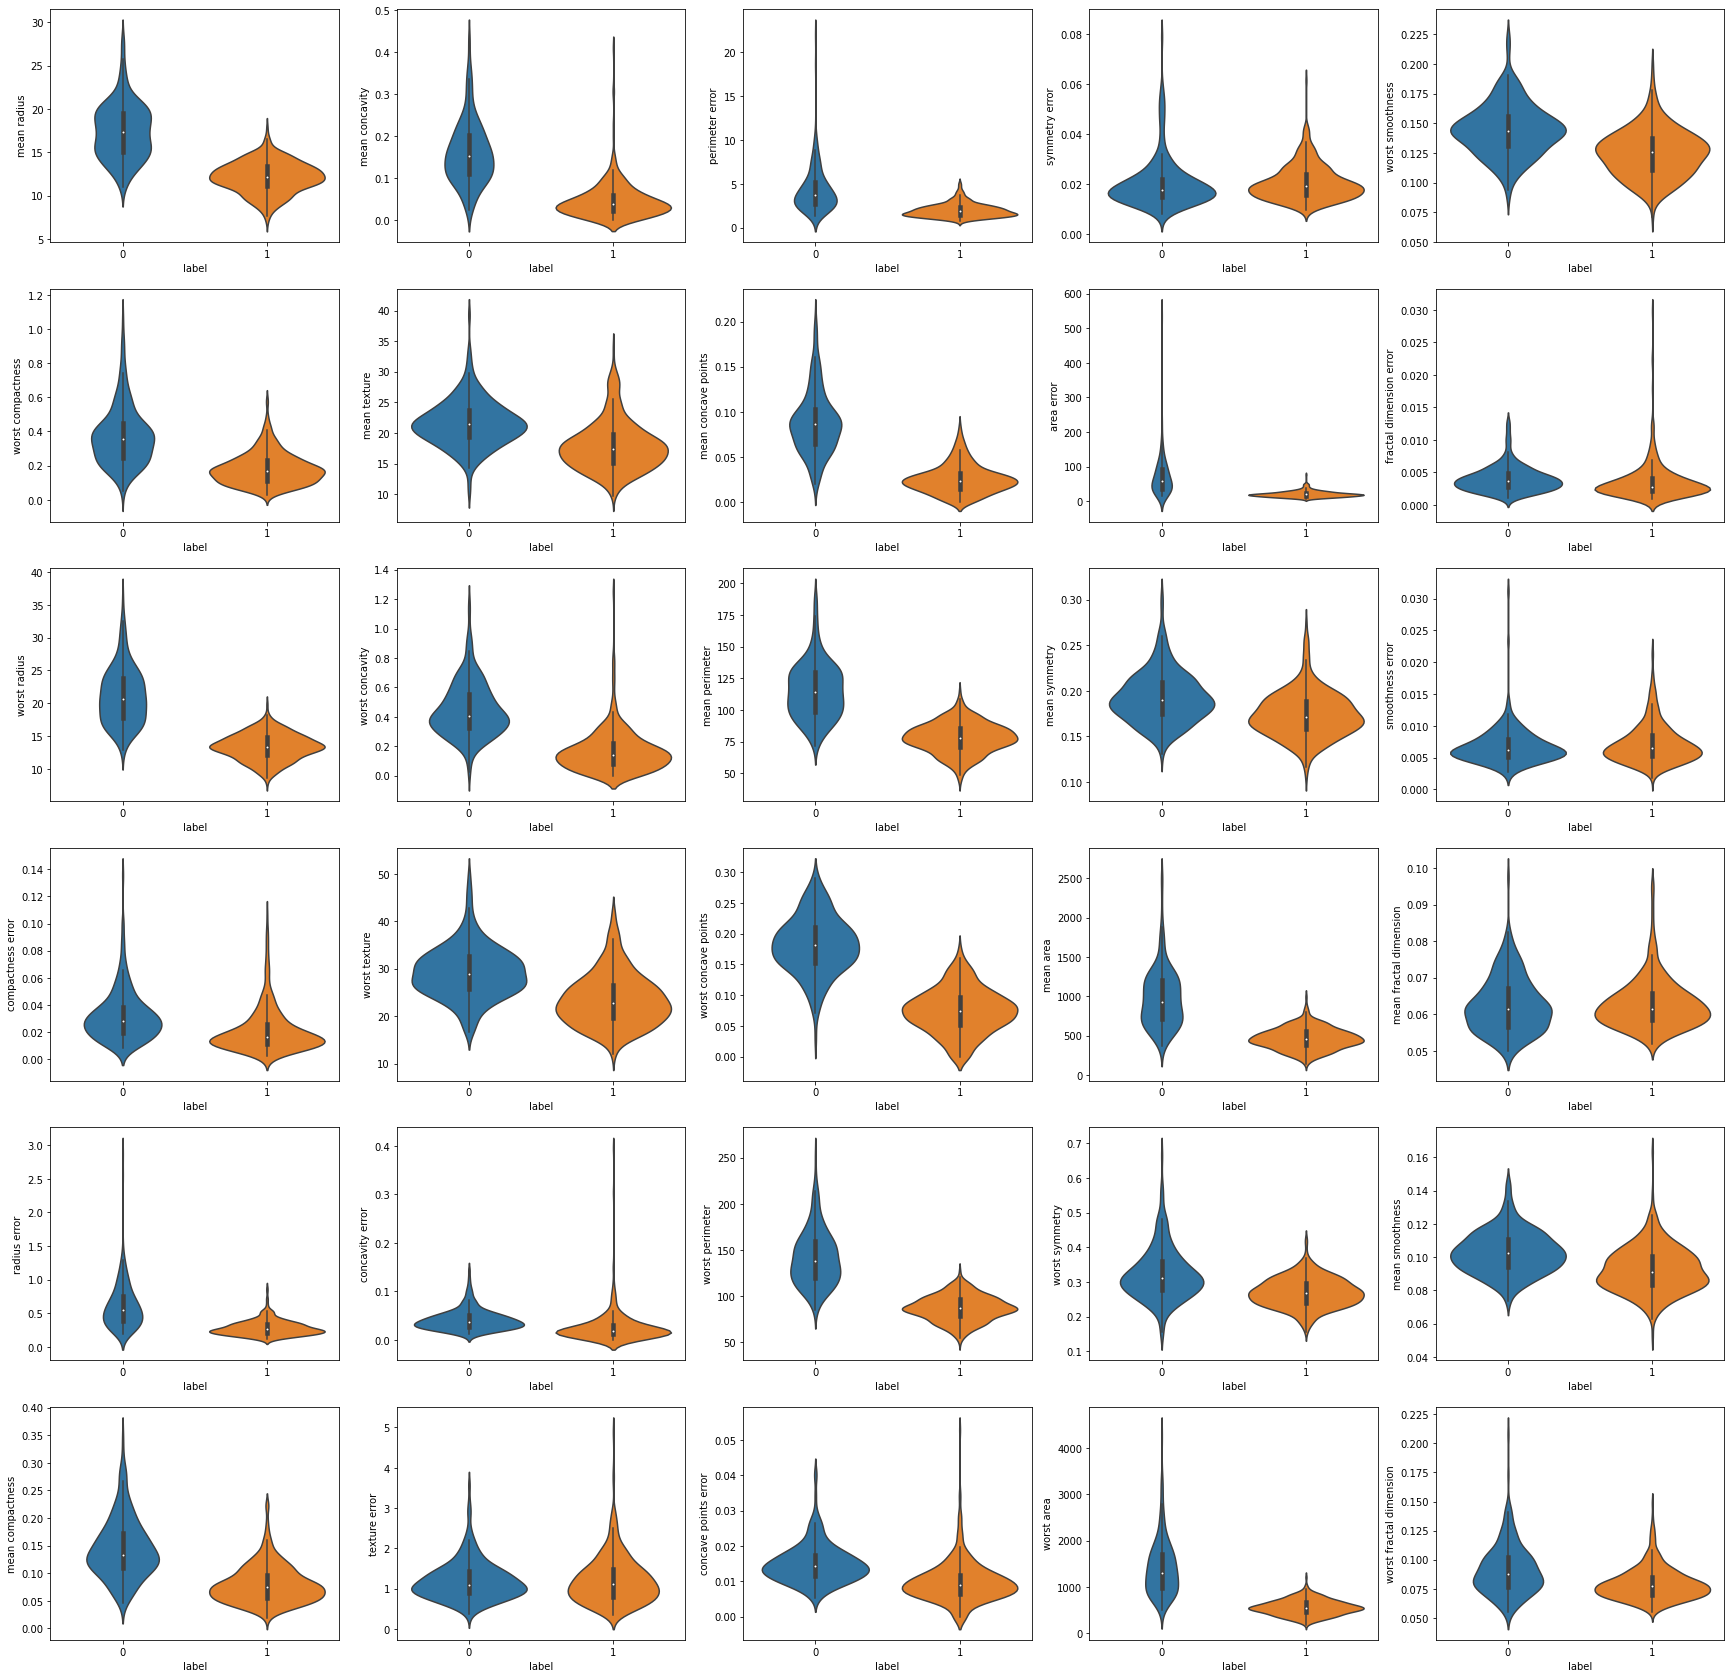

In [9]:
print("Class counts:\n", df.groupby(['label']).count())
    
fig, axes = plt.subplots(6,5, figsize=(30,30))

for index, name in enumerate(df.columns):
  if name == 'label':
    break
  sns.violinplot(data=df, x='label', y=name, ax=axes[index%6,index%5]); 


Feature correlation matrix:

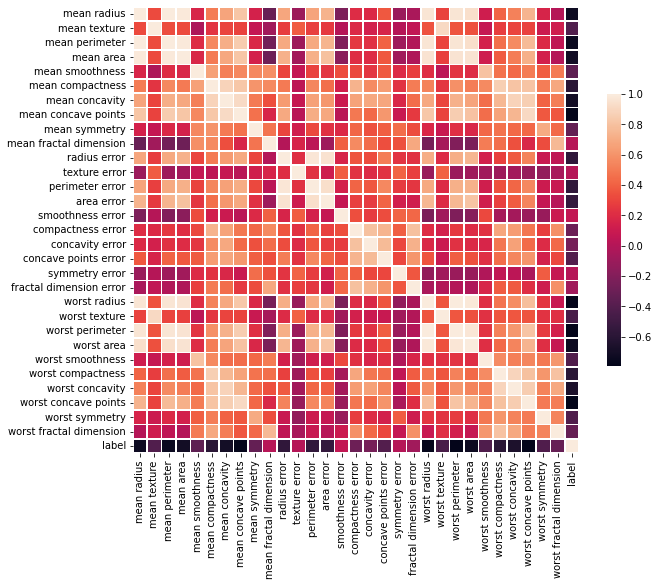

In [10]:
correlationMatrix = df.corr()

fig, ax = plt.subplots(figsize=(10,10))  
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(correlationMatrix, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Splitting data into training and testing datasets:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['label', 'label names']), df['label'], test_size = 0.2, train_size = 0.8, random_state= 0)


## 3. Cancer classifier and tree visualization ##

In [13]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

In [14]:
!pip3 install graphviz pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pydotplus
import io
from IPython.display import Image
from sklearn.tree import  export_graphviz

dot_data = io.StringIO()
export_graphviz(clf, out_file=dot_data,
                    filled=True, rounded=True,
                    rotate=False,
                    node_ids = True,
                    special_characters=True,
                    leaves_parallel=False,
                    feature_names = cancer.feature_names,
                    class_names=cancer.target_names,
                   )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png');

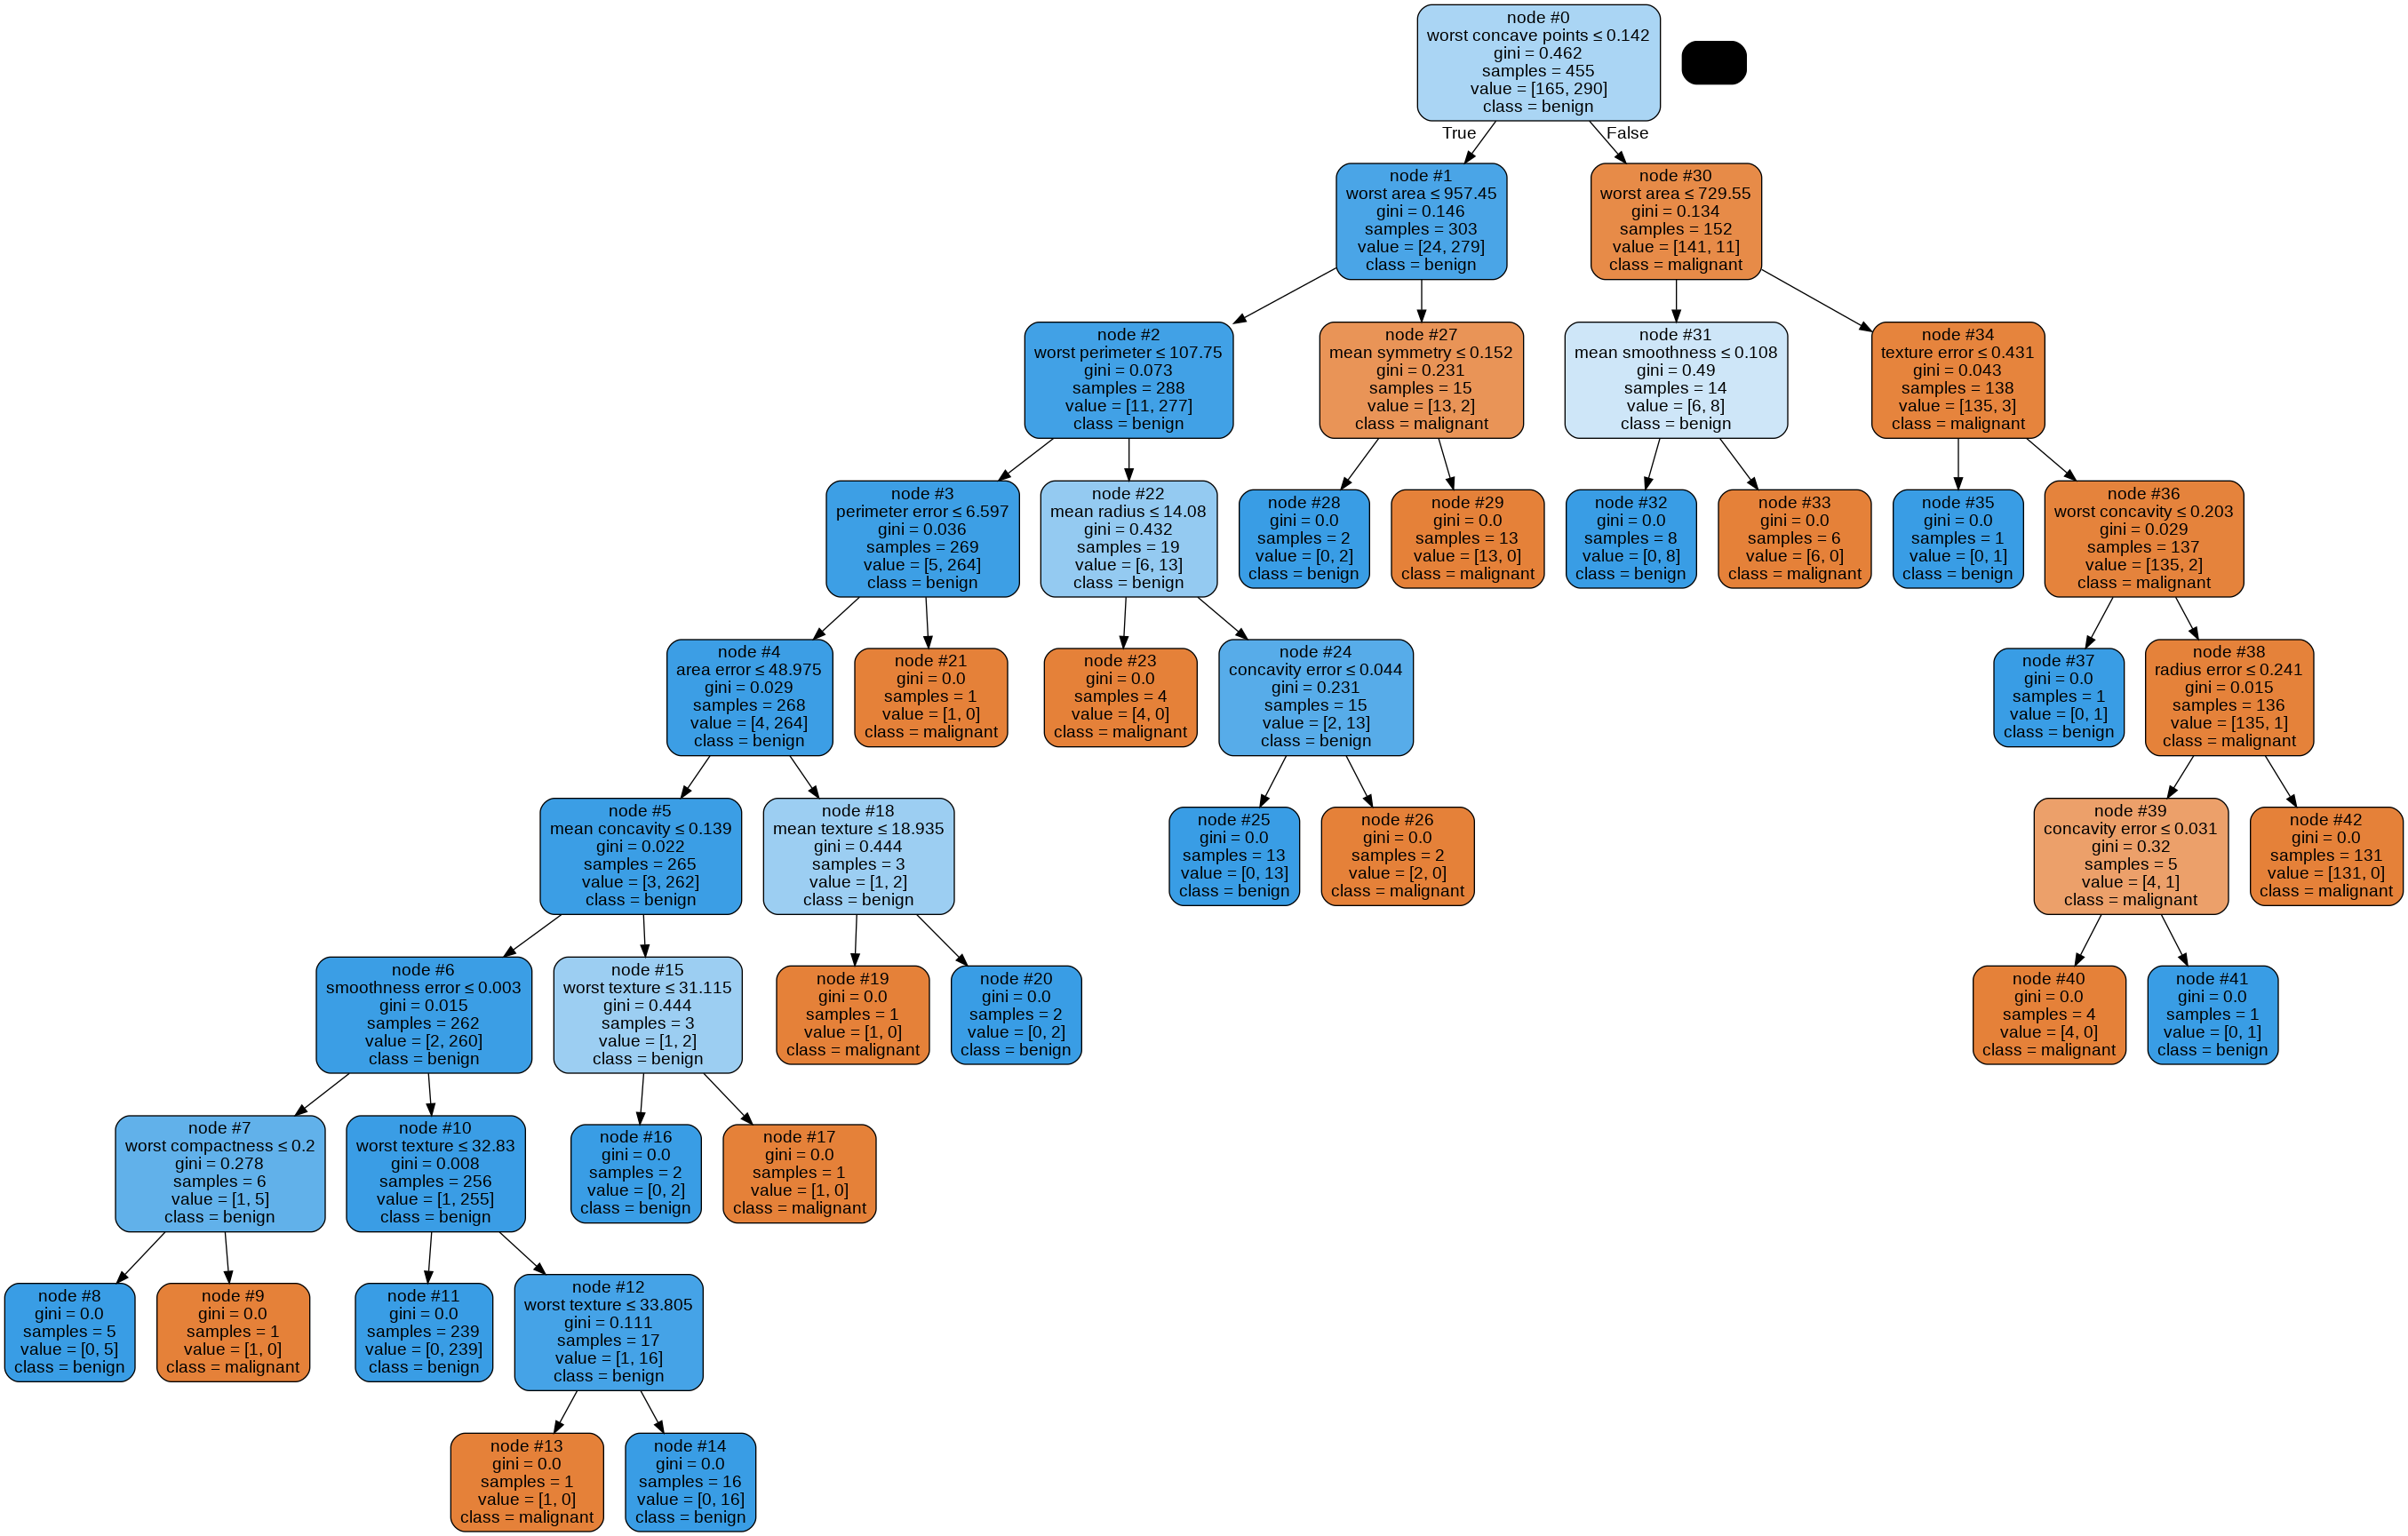

In [16]:
from IPython.display import Image
Image(graph.create_png())

Print classification report on test and train dataset:



In [17]:
printScores(clf, X_test, y_test)

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        47
           1       0.95      0.88      0.91        67

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114

Confusion matrix:
[[44  3]
 [ 8 59]]


In [18]:
printScores(clf, X_train, y_train)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       290

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Confusion matrix:
[[165   0]
 [  0 290]]


From the classification reports presented, it can be seen that the model is overfitted.

Let's see feature importance: 



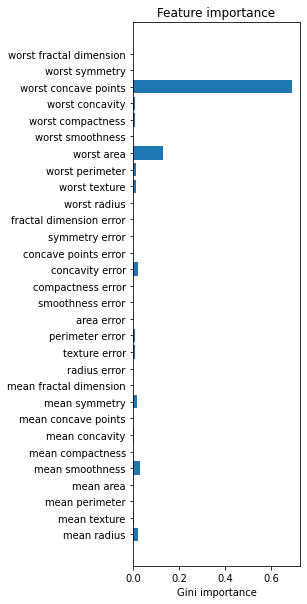

In [19]:
plt.figure(figsize=(3,10))
fi = clf.feature_importances_
plt.barh(cancer.feature_names, fi)
plt.title('Feature importance')
plt.xlabel('Gini importance')
plt.show()

### Tree pruning:



In [20]:
path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

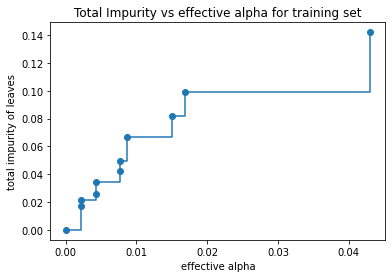

In [21]:
fig, ax = plt.subplots()

ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

Optimizing *alpha* coeff:

In [22]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf = clf.fit(X_train, y_train) 
    clfs.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32027199074911666


In [24]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

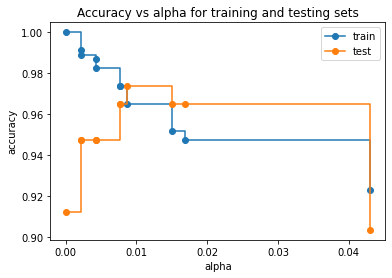

Max test score for alpha: [0.00865816] with index (array([7]),)


In [29]:
# acc for different alphas
train_scores = [clf.score(X_train, y_train, ) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")

plt.plot(ccp_alphas[0:-1], train_scores[0:-1], label = 'train', marker = 'o', drawstyle="steps-post")
plt.plot(ccp_alphas[0:-1], test_scores[0:-1], label = 'test', marker = 'o', drawstyle="steps-post")

ax.legend()
plt.show()

print('Max test score for alpha: '+str(ccp_alphas[np.where(test_scores == np.amax(test_scores))])+' with index '+ str(np.where(test_scores == np.amax(test_scores))))

Final model fitting and scoring:

In [31]:
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[7])
clf = clf.fit(X_train, y_train) 
printScores(clf, X_test, y_test)

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix:
[[45  2]
 [ 1 66]]
